<a href="https://colab.research.google.com/github/Ozmer/Omar_Project/blob/master/Copy_of_Copy_of_Generate_and_classify_cardiac_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Lib**

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.utils import shuffle
import random 

**classification function**

In [ ]:
def Gen_Triage(stv):#13 
    res = {} 
    spo2 ,HB, LB, Ch, Sh, Palip, Rest, Peaks, QR, PP, STEL, _  = stv
    res["RISK"] = 12.0 if spo2 <= 80 else 0
    res["RISK"] += 7.0 if HB >= 22 else 0
    res["RISK"] += 10.0 if Peaks >=130 else 0
    #urgent 
    res["URGENT"] = 12.0 if (spo2 >= 81 and spo2 <=90) else 0
    res["URGENT"] += 5.0 if (HB >=18 and HB <= 21.9) else 0
    res["URGENT"] += 5.0 if LB >=11 else 0
    res["URGENT"] += 10.0 if ( Peaks <= 40 or (Peaks >= 111 and Peaks <= 129) ) else 0
    res["URGENT"] += 4.0 if PP =='irregular' else 0
    #sick  
    res["SICK"] =  6.0 if (spo2 >= 91 and spo2 <=95) else 0
    res["SICK"] += 4.0 if (HB >=14 and HB <= 17.9) else 0
    res["SICK"] += 3.0 if (LB >=9 and LB <=11) else 0
    res["SICK"] += 10.0 if ((Peaks >= 41 and Peaks <= 50) or (Peaks >= 101 and Peaks <= 110)) else 0
    res["SICK"] += 4.0 if QR>0.3 else 0
    res["SICK"] += 2.0 if Rest=='Yes' else 0#000
    res["SICK"] += 6.0 if Palip=='Yes' else 0
    res["SICK"] += 18.0 if Ch=='Yes' else 0
    res["SICK"] += 12.0 if Sh=='Yes' else 0
    res["SICK"] += 20.0 if STEL=='Yes' else 0 #Straight 
    #COLD STATE    
    res["COLD STATE"] = 10.0 if (Peaks >= 50 and Peaks <= 59) else 10.0 if (Peaks >= 91 and Peaks <= 100)else 0
    res["COLD STATE"] += 0.0 if PP =='regular' else 4.0 #some test

    res["COLD STATE"] += 12.0 if spo2 <= 80 else 0
    res["COLD STATE"] += 7.0 if HB >= 22 else 0
    #NORMAL    
    res["NORMAL"]  = 0.0 if (spo2 >= 96 and spo2 <=100) else  6.0 if (spo2 >= 91 and spo2 <=95) else 12.0 
    res["NORMAL"] += 0.0 if (HB >=11 and HB <= 14) else 4.0 if (HB >=14 and HB <= 18)  else 5.0 if (HB >=18 and HB <= 22) else 7.0 
    res["NORMAL"] += 0.0 if (LB >=6 and LB <=9) else 3.0 if (LB >=9 and LB <=11) else 5.0
    res["NORMAL"] += 0.0 if (Peaks >= 60 and Peaks <= 90) else 10.0
    res["NORMAL"] += 0.0 if Rest=='No' else 2.0
    res["NORMAL"] += 0.0 if Ch=='No' else 18.0
    res["NORMAL"] += 0.0 if Palip=='No' else 6.0
    res["NORMAL"] += 0.0 if Sh=='No' else 12.0
    res["NORMAL"] += 0.0 if QR < 0.3 else 4.0
    res["NORMAL"] += 0.0 if STEL=='No' else 20.0
    if res["NORMAL"] <= 15 and PP=='regular' and (HB <=14 or (Peaks >= 60 and Peaks <= 90)) and (spo2 >= 80 and spo2 <= 90):
       return "NORMAL"
    if res["RISK"] >= 17:
       return "RISK"
    if res["SICK"] >= 66:
       return "SICK"
    if res["URGENT"] >= 22 and PP =='irregular':
       return "URGENT"

    if (res["COLD STATE"] == 10):
       return "COLD STATE"
    return "null" 

**Test classify Triage function**

In [ ]:
s = Gen_Triage([90, 19.0, 9.0, 'Yes', 'Yes', 'Yes', 'Yes', 115, 0.14, 'irregular', 'No', 'None']) 
print(s) 

URGENT


**Column names**

In [ ]:
all_col = '''
Spo2
HBlood
LBlood
ChestPain
SHBreath
Palip
Rest
Peaks
QRSwidth
P_P
STEl
Triage
'''

**Number of samples to be generated**

In [ ]:
numdata = 20000000

**start gen all columns in range 75 to 100**

In [ ]:
wl = pd.DataFrame(np.random.randint(75,100 ,size=(numdata, 12)) ,columns=all_col.split()) 

In [ ]:
wl.head(5) 

,Spo2,HBlood,LBlood,ChestPain,SHBreath,Palip,Rest,Peaks,QRSwidth,P_P,STEl,Triage
0,98,98,76,98,99,91,87,86,96,76,93,87
1,94,92,79,94,76,88,81,77,97,93,86,76
2,76,79,91,87,89,98,99,99,98,85,94,81
3,81,97,87,92,90,79,81,76,92,87,86,81
4,76,84,76,85,88,89,92,84,95,81,83,95


**We Change the fields values according to the criteria and range of each field**

In [ ]:
wl['HBlood']   = pd.Series(random.choices(np.arange(11.0, 23.1, 0.5).tolist(), weights=np.arange(11.0, 23.1, 0.5).tolist(), k=len(wl))) 
wl['LBlood']   = pd.Series(random.choices(np.arange(6.0, 12.1, 0.5).tolist(), weights=np.arange(6.0, 12.1, 0.5).tolist(), k=len(wl))) 
wl['QRSwidth'] = pd.Series(random.choices(np.arange(0.06, 0.40, 0.02).tolist(), weights=np.arange(0.06, 0.40, 0.02).tolist(), k=len(wl))) 

In [ ]:
wl['ChestPain'] = pd.Series(random.choices(['Yes','No'], weights=[1, 1], k=len(wl)))
wl['SHBreath']  = pd.Series(random.choices(['Yes','No'], weights=[1, 1], k=len(wl)))
wl['Palip']     = pd.Series(random.choices(['Yes','No'], weights=[1, 1], k=len(wl)))
wl['Rest']      = pd.Series(random.choices(['Yes','No'], weights=[1, 1], k=len(wl)))

wl['P_P']  = pd.Series(random.choices(['regular','irregular'], weights=[1, 1], k=len(wl)))
wl['STEl'] = pd.Series(random.choices(['Yes','No'], weights=[1, 1], k=len(wl))) 

In [ ]:
wl['Peaks'] = pd.DataFrame(np.random.randint(40,140 ,size=(numdata, 1)) ,columns=['Peaks']) 

In [ ]:
#show data after Change
wl.head(5) 

,Spo2,HBlood,LBlood,ChestPain,SHBreath,Palip,Rest,Peaks,QRSwidth,P_P,STEl,Triage
0,80,23.0,10.5,No,No,Yes,Yes,105,0.22,irregular,No,93
1,81,19.5,11.5,Yes,Yes,Yes,No,50,0.20,irregular,Yes,81
2,76,17.5,6.0,Yes,Yes,Yes,Yes,117,0.38,irregular,Yes,94
3,91,18.0,12.0,No,Yes,No,Yes,72,0.36,regular,Yes,80
4,92,14.0,12.0,Yes,No,No,Yes,100,0.36,irregular,No,82


**Start by running the classification using Triage function on all the data**

In [ ]:
wl['Triage'] = wl.apply(Gen_Triage, axis=1) 

In [ ]:
#Show the number of samples for each case
wl['Triage'].value_counts()  

null          15422174
RISK           1409325
URGENT         1268058
COLD STATE     1248166
SICK            646328
NORMAL            5949
Name: Triage, dtype: int64

**Remove Case None**

In [ ]:
wl = wl[wl['Triage'] != 'null'] 
wl['Triage'].value_counts()  

RISK          1409325
URGENT        1268058
COLD STATE    1248166
SICK           646328
NORMAL           5949
Name: Triage, dtype: int64

**Adjust the maximum number of samples to a uniform number**

In [ ]:
max_num = 120000  #We can Chinge this value

In [ ]:
URGENT = wl[wl['Triage'] == 'URGENT'][:max_num]
SICK = wl[wl['Triage'] == 'SICK'][:max_num]
COLD_STATE = wl[wl['Triage'] == 'COLD STATE'][:max_num]
NORMAL = wl[wl['Triage'] == 'NORMAL'][:max_num]
RISK = wl[wl['Triage'] == 'RISK'][:max_num]

**Merge all Cases to one dataframe**

In [ ]:
wl2 = pd.concat([URGENT, SICK, COLD_STATE, NORMAL, RISK]) 
wl2.head(3) 

,Spo2,HBlood,LBlood,ChestPain,SHBreath,Palip,Rest,Peaks,QRSwidth,P_P,STEl,Triage
5,84,15.5,8.0,No,No,No,Yes,119,0.38,irregular,No,URGENT
23,87,21.5,6.5,Yes,No,No,No,116,0.14,irregular,Yes,URGENT
56,83,20.5,6.5,Yes,No,No,Yes,124,0.34,irregular,Yes,URGENT


**Re Shuffle DataFrame rows**

In [ ]:
wl2 = shuffle(wl2)
wl2.head(10)

,Spo2,HBlood,LBlood,ChestPain,SHBreath,Palip,Rest,Peaks,QRSwidth,P_P,STEl,Triage
2811862,91,16.5,6.0,Yes,Yes,Yes,Yes,54,0.30,irregular,Yes,SICK
972894,80,23.0,8.0,Yes,Yes,Yes,No,48,0.20,irregular,No,RISK
241039,93,15.5,7.0,Yes,No,Yes,Yes,59,0.36,regular,No,COLD STATE
3045525,93,12.5,11.0,Yes,Yes,Yes,Yes,58,0.36,irregular,Yes,SICK
2149247,80,15.5,11.5,Yes,Yes,Yes,Yes,74,0.38,irregular,Yes,SICK
1835898,96,20.5,8.5,Yes,Yes,No,Yes,51,0.24,regular,No,COLD STATE
1286070,94,18.0,11.5,Yes,Yes,Yes,No,91,0.32,regular,No,COLD STATE
2391970,91,18.5,11.0,Yes,Yes,Yes,Yes,43,0.28,regular,Yes,SICK
3697209,95,11.5,12.0,Yes,Yes,Yes,Yes,98,0.38,irregular,Yes,SICK
109455,91,13.0,12.0,Yes,Yes,Yes,Yes,89,0.32,regular,Yes,SICK


In [ ]:
wl2.shape

(485949, 12)

**We  are Save data to Google Drive,**
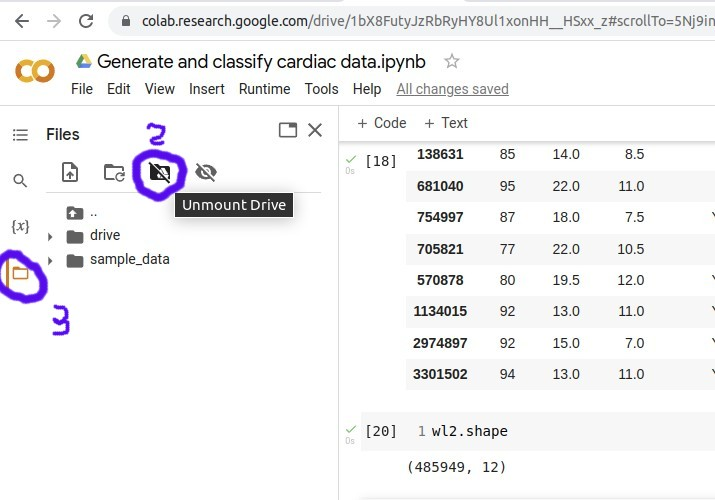


**Please Mounte Drive by pressing the files icon on the left of the screen and then the Drive icon, before executing the next cell.**

In [ ]:
wl2.to_excel('/content/drive/MyDrive/dataset_genh10_10_2022.xlsx',index=False) 

**Done..**